## 📱 Google App Store App Analysis

*This project analyzes Google Play Store data to find trends in `app installs`,
`ratings`, `content ratings`, and monetization methods like `ads`,` in-app purchases`, etc.*  
**The goal is to extract useful insights about user preferences and app success factors.**


### **Data Loading & Cleaning**
*Here, we import the dataset and clean missing or invalid data (like `ratings` or `installs`).* *We also convert sizes, formats, and types to be analysis-ready.*


**Importing Libraries and Reading Dataset**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('app_data(2010-2021).csv')

**Shape, Head, Info**

In [3]:
df.shape

(799999, 24)

In [4]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799999 entries, 0 to 799998
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   App Name           799998 non-null  object 
 1   App Id             799999 non-null  object 
 2   Category           799999 non-null  object 
 3   Rating             792086 non-null  float64
 4   Rating Count       792086 non-null  float64
 5   Installs           799963 non-null  object 
 6   Minimum Installs   799963 non-null  float64
 7   Maximum Installs   799999 non-null  int64  
 8   Free               799999 non-null  bool   
 9   Price              799999 non-null  float64
 10  Currency           799947 non-null  object 
 11  Size               799932 non-null  object 
 12  Minimum Android    797783 non-null  object 
 13  Developer Id       799991 non-null  object 
 14  Developer Website  536705 non-null  object 
 15  Developer Email    799992 non-null  object 
 16  Re

**Cleaning columns names**

In [6]:
df.columns = df.columns.str.lower()  # Convert to lowercase
df.columns = df.columns.str.strip() # Remove leading and trailing spaces
df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores
df.columns

Index(['app_name', 'app_id', 'category', 'rating', 'rating_count', 'installs',
       'minimum_installs', 'maximum_installs', 'free', 'price', 'currency',
       'size', 'minimum_android', 'developer_id', 'developer_website',
       'developer_email', 'released', 'last_updated', 'content_rating',
       'privacy_policy', 'ad_supported', 'in_app_purchases', 'editors_choice',
       'scraped_time'],
      dtype='object')

**Removing Unwanted Columns**


In [7]:
df.drop(columns=['app_id','developer_id','developer_website','developer_email','privacy_policy',
                 'minimum_installs','installs','scraped_time','minimum_android'], inplace=True)

**Renaming Columns**

In [99]:
df.rename(columns={
    'free': 'is_free',
    'size': 'app_size',
    'released': 'release_date',
    'last_updated': 'last_updated_date',
    'content_rating': 'age_limit'
}, inplace=True)


**Handling Duplicate Values**

In [9]:
df.duplicated().sum() # Counting duplicates

1

In [10]:
df = df.drop_duplicates() # Drop duplicates

**Checking for Missing Values**

In [11]:
df.isnull().sum()  # Counting Missing Values

app_name                 1
category                 0
rating                7913
rating_count          7913
maximum_installs         0
is_free                  0
price                    0
currency                52
app_size                67
release_date         24440
last_updated_date        0
content_rating           0
ad_supported             0
in_app_purchases         0
editors_choice           0
dtype: int64

**Handling Missing Values accourding to the columns**

- `app_name` Column

In [12]:
df[df['app_name'].isnull()].index # checking index number where `app_name` is null

Index([45686], dtype='int64')

In [13]:
df.drop(45686,inplace=True) # deleting null row where index number is [45686]

- `rating` Column

In [14]:
df['rating'].fillna(df['rating'].mean(),inplace=True) # filling null values with average of ratings

C:\Users\vanda\AppData\Local\Temp\ipykernel_7316\160404643.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].mean(),inplace=True) # filling null values with average of ratings


- `rating_count` Column

In [15]:
df['rating_count'].fillna(0,inplace=True) #filling null values with zero

C:\Users\vanda\AppData\Local\Temp\ipykernel_7316\231057196.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating_count'].fillna(0,inplace=True) #filling null values with zero


- `currency` Column

In [16]:
df['currency'].fillna(df['currency'].mode()[0],inplace= True) # filling null values with most frequent currency type (mode)

C:\Users\vanda\AppData\Local\Temp\ipykernel_7316\3653745223.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['currency'].fillna(df['currency'].mode()[0],inplace= True) # filling null values with most frequent currency type (mode)


- `app_size` Column

In [17]:
df['app_size'].unique() # checking unique sizes(MB,GB,Kb)

array(['10M', '2.9M', '3.7M', ..., '344M', '232M', '418M'], dtype=object)

In [18]:
# creating function to remove(M,G) from last then convert into MB
def convert_size(x):
    try:
        if 'M' in x :
            return float(x.replace('M',''))
        elif 'G' in x:
            return float(x.replace('G',''))*1024 # GB to MB
        else:
            return 0
    except:
        return 0
    
df['app_size_mb'] = df['app_size'].apply(convert_size) # creating new column then applying function
df.drop(columns=['app_size'], inplace=True) # dropping old column

- `release_date` Column

In [19]:
df = df.dropna(subset=['release_date']) # dropped null values

**Checking Missing values (if any left)**

In [20]:
df.isnull().sum()

app_name             0
category             0
rating               0
rating_count         0
maximum_installs     0
is_free              0
price                0
currency             0
release_date         0
last_updated_date    0
content_rating       0
ad_supported         0
in_app_purchases     0
editors_choice       0
app_size_mb          0
dtype: int64

**Creating & Converting Columns**

In [21]:
# converting columns to appropriate Data Types
df['release_date']= pd.to_datetime(df['release_date'])
df['last_updated_date']= pd.to_datetime(df['last_updated_date'])
df['rating_count'] = df['rating_count'].astype(int)
 
# creating month and year columns
df['released_year'] = df['release_date'].dt.year
df['released_month'] = df['release_date'].dt.month_name()

### **Exploratary Data Analysis**

> ##### **🔹Calculating App Count based on year & month**

In [65]:
# Apps Released Each Year
year_data = ( df.groupby('released_year')
    .size()
    .reset_index(name='app_count')
    .reset_index(drop=True) 
    )

display(year_data)

,released_year,app_count
0,2010,1554
1,2011,4936
2,2012,8798
3,2013,14571
4,2014,24558
5,2015,39997
6,2016,58107
7,2017,90084
8,2018,115563
9,2019,166148


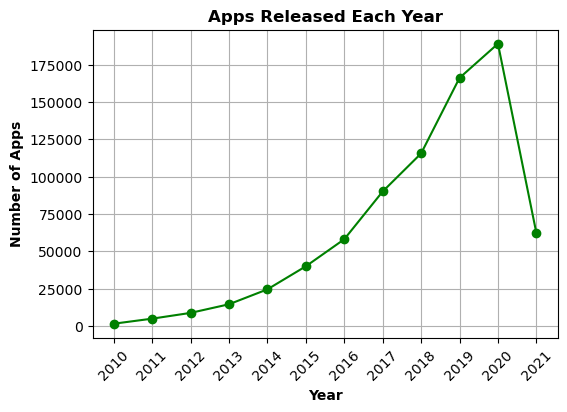

In [66]:
# plot Apps Released Each Year
plt.figure(figsize=(6,4))
plt.plot(year_data['released_year'], year_data['app_count'], marker='o',color='green')

plt.title('Apps Released Each Year',fontweight='bold')
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Number of Apps',fontweight='bold')
plt.grid(True)
plt.xticks(ticks=year_data['released_year'],rotation=45)
plt.yticks()
plt.show()

In [67]:
# Apps Released Each Month
month_data = ( 
    df.groupby('released_month')
    .size() 
    .reset_index(name='app_count')
    .sort_values(by='app_count', ascending=False)
    .assign(released_month=lambda x: pd.Categorical(x['released_month'], categories=month_names, ordered=True))
    .sort_values(by='released_month')
    .reset_index(drop=True)
    )
display(month_data)

,released_month,app_count
0,January,64645
1,February,62837
2,March,69901
3,April,67578
4,May,71059
5,June,63673
6,July,62491
7,August,61086
8,September,62309
9,October,64831


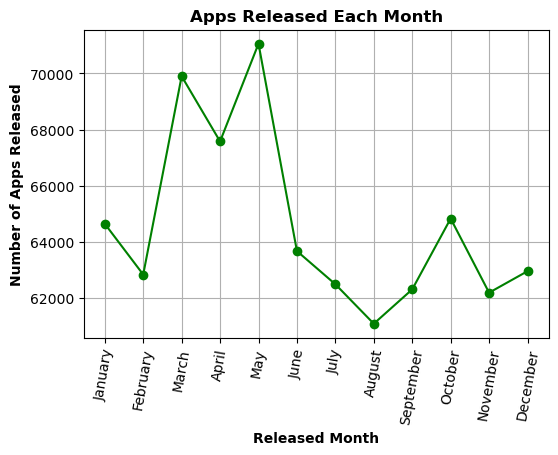

In [68]:
# creating month_names to short by exact month order
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December']

# Plot of Apps Released Each Month
plt.figure(figsize=(6, 4))
plt.plot(month_data['released_month'], month_data['app_count'], marker='o', color='green')

plt.xlabel('Released Month', fontweight='bold')
plt.ylabel('Number of Apps Released', fontweight='bold')
plt.title('Apps Released Each Month', fontweight='bold')
plt.xticks(rotation=80)
plt.grid(True)
plt.show()

**Insights-** 
- *App Releases is increasing over the years, sudden decline in 2021, Becasuse of Covid-19 Pendemic*
- *Most App released in May, March, April. Best time for launching new apps* 

> ##### **🔹Finding maximum installs by category & year**

In [69]:
# Finding maximum installs by category
top_category = (df.groupby('category')['maximum_installs']
    .sum()
    .reset_index(name='max_downloads')
    .sort_values(by='max_downloads', ascending=False)
    .reset_index(drop=True) 
    .head(10))

display(top_category) # showing data

,category,max_downloads
0,Tools,25404914125
1,Communication,19695859644
2,Action,12311635092
3,Productivity,11716321900
4,Video Players & Editors,11098965646
5,Casual,10939380887
6,Entertainment,10249684262
7,Arcade,10243662364
8,Photography,9327649130
9,Social,8187412913


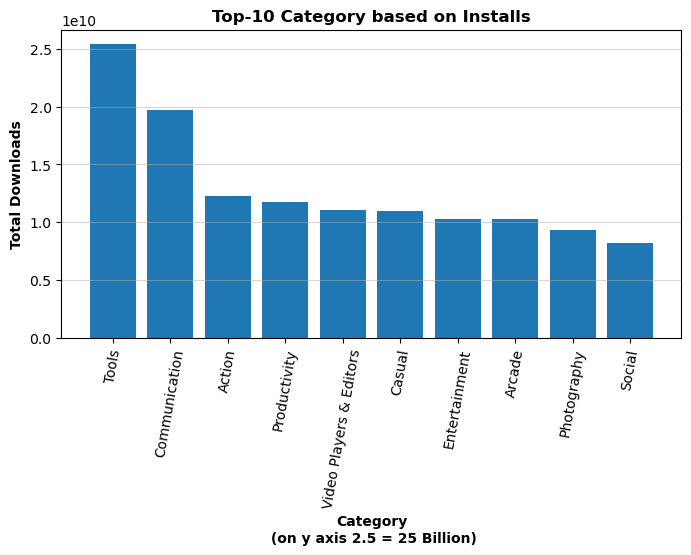

In [85]:
# Plot of top-10 installs by category
plt.figure(figsize=(8,4)) 
plt.bar(top_category['category'],top_category['max_downloads'])
plt.title('Top-10 Category based on Installs', fontweight='bold')
plt.xlabel('Category\n (on y axis 2.5 = 25 Billion)', fontweight='bold')
plt.ylabel('Total Downloads', fontweight='bold')
plt.xticks(rotation=80)
plt.grid(axis='y', alpha=0.5)
plt.show()

In [81]:
# Installs based on Year
apps_by_year = (df.groupby('released_year')['maximum_installs']
    .sum()
    .reset_index(name='max_downloads')
    .reset_index(drop=True) 
)

display(apps_by_year)

,released_year,max_downloads
0,2010,21655796706
1,2011,16887667193
2,2012,22186397199
3,2013,16707100158
4,2014,20861369697
5,2015,21912024167
6,2016,20356851586
7,2017,29894476170
8,2018,22677938000
9,2019,16678100807


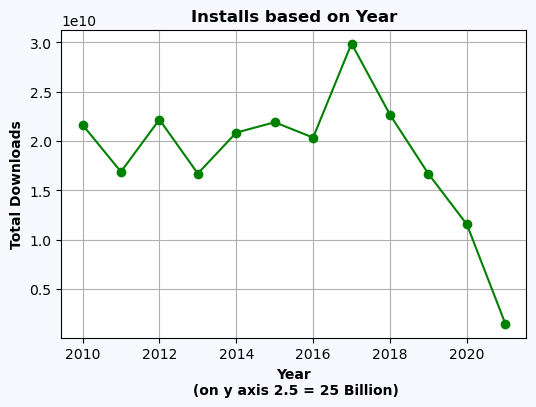

In [87]:
# plot of Installs based on Year
plt.figure(figsize=(6,4), facecolor='ghostwhite')
plt.plot(apps_by_year['released_year'],apps_by_year['max_downloads'],color='g', marker='o')

plt.title('Installs based on Year', fontweight='bold')
plt.xlabel('Year\n (on y axis 2.5 = 25 Billion)', fontweight='bold')
plt.ylabel('Total Downloads', fontweight='bold')
plt.grid(True)
plt.show()

**Insights-**
- *Number of Download were peaked in 2016 to 2018, and dropped after 2018*

> ##### **🔹Calculating Average ratings based on categories**

In [24]:
# Avg rating of all categories
ratings_data = round(df.groupby('category')['rating']
    .mean()
    .reset_index(name='avg_ratings')
    .sort_values(by='avg_ratings',ascending=False)
    .reset_index(drop=True)
    ,1) # rounding to 2 decimal places

display(ratings_data)

,category,avg_ratings
0,Role Playing,3.4
1,Casino,3.3
2,Simulation,3.2
3,Weather,3.2
4,Card,3.1
5,Racing,3.0
6,Video Players & Editors,2.9
7,Word,2.9
8,Strategy,2.9
9,Adventure,2.8


>##### **🔹Highest Rated Apps - Rating count**

In [57]:
( 
df[['app_name', 'rating', 'rating_count']]
.sort_values(by=['rating_count'],ascending=False)
.reset_index(drop=True)
.head(10)
)

,app_name,rating,rating_count
0,WhatsApp Messenger,4.0,138557570
1,Instagram,3.8,120206190
2,Garena Free Fire - Rampage,4.2,89177097
3,Clash of Clans,4.5,56025424
4,PUBG MOBILE - Traverse,4.3,37479011
5,TikTok,4.4,36446381
6,Candy Crush Saga,4.6,31476637
7,Roblox,4.4,22148032
8,SHAREit - Transfer & Share,4.2,16023749
9,Truecaller: ID & spam block,4.5,15171424


> ##### **🔹Calculating average ratings and total installs based on Editor's Choice**

In [26]:
result = (df.groupby('editors_choice')
    .agg(
    avg_rating=('rating', lambda x: round(x.mean(), 1)), # taking average of ratings
    total_installs=('maximum_installs', 'sum')
    )
    .reset_index(names='editors_choice')
)

result['editors_choice'] = result['editors_choice'].map({True: 'Yes', False: 'No'}) # mapping for changing names
display(result)

,editors_choice,avg_rating,total_installs
0,No,2.2,193633490849
1,Yes,4.3,29239203557


**Insight-**
- *Apps with Editor's Choice have higher ratings and installs, it means Editor's Choice is a good indicator of app quality*

>##### **🔹Calculating Installs of Free & Paid Apps**

In [27]:
total_installs_by_app_type = (   
                              
    df.groupby(df['is_free']
    .map({True: 'Free', False: 'Paid'}))['maximum_installs']
    .sum()
    .rename_axis('Type')
    .reset_index(name='Total Installs')
)

display(total_installs_by_app_type)

,Type,Total Installs
0,Free,222599593250
1,Paid,273101156


**Insight-**
- *Free apps have higher insatlls, mean users prefer free apps*

>##### **🔹Highest no. Of Paid Apps based on category**

In [59]:
# changing every currency into us doller
currency_to_usd = {  
    'BRL': 0.18,
    'CAD': 0.73,
    'EUR': 1.08,
    'GBP': 1.27,       # Define exchange rates to USD
    'INR': 0.012,
    'KRW': 0.00074,
    'USD': 1.0,
    'VND': 0.000039,
    'XXX': 0.0  # or np.nan
}

# Creating new column for price in USD
df['price_usd'] = df['price'] * df['currency'].map(currency_to_usd) # using mapping


# Finding the highest number of paid apps based on category and average price
highest_paid_apps = (
    
    df[df['is_free'] == False]  # filtering paid apps
    .groupby('category')
    .agg(
        number_of_paid_apps=('app_name', 'size'),
        avg_price_usd=('price_usd', lambda x: round(x.mean(), 2))
        )
    .reset_index(names='category')
    .sort_values(by='number_of_paid_apps', ascending=False)
    .head(10)
    .reset_index(drop=True)
)

display(highest_paid_apps)

,category,number_of_paid_apps,avg_price_usd
0,Education,2212,5.59
1,Personalization,2025,1.81
2,Tools,1357,4.84
3,Books & Reference,1245,6.48
4,Productivity,576,6.92
5,Music & Audio,528,4.03
6,Travel & Local,483,3.51
7,Sports,477,7.82
8,Health & Fitness,472,6.58
9,Medical,462,14.83


>##### **🔹Calculating in_app_purchases Apps are mostly free?**

In [88]:
# Check how many apps are free
inapp_percentage = df['is_free'].value_counts(normalize=True)*100 # `normalize=True` gives percentage proportion

inapp_final = inapp_percentage.rename(index={True : 'Yes', False: 'No'}).reset_index(name='Percentage (%)').round(2)

display(inapp_final)

,is_free,Percentage (%)
0,Yes,98.02
1,No,1.98


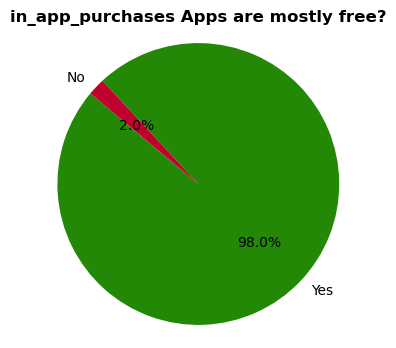

In [94]:
# plot
plt.figure(figsize=(4,4))
plt.pie(inapp_final['Percentage (%)'], labels=inapp_final['is_free'], autopct='%1.1f%%', startangle=140, colors=["#228806", "#C1002D"])

plt.title('in_app_purchases Apps are mostly free?', fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

> ##### **🔹Analysing App Size Trend by year**

In [95]:
app_size_by_year = df.groupby('released_year')['app_size_mb'].mean().reset_index(name='avg_size(mb)').round(2)

display(app_size_by_year)

,released_year,avg_size(mb)
0,2010,12.47
1,2011,12.05
2,2012,13.76
3,2013,15.06
4,2014,14.42
5,2015,14.83
6,2016,16.45
7,2017,16.86
8,2018,17.06
9,2019,18.20


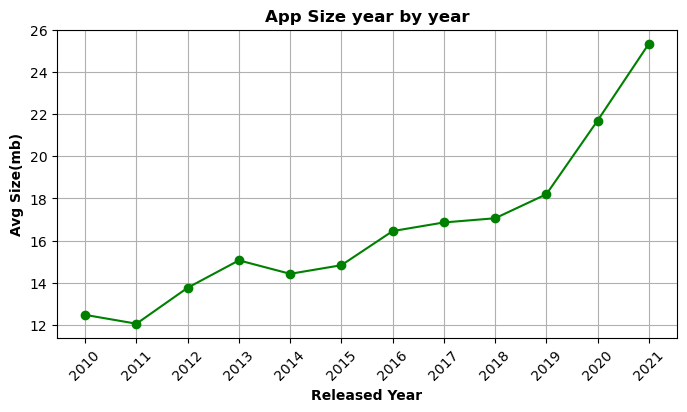

In [96]:
# plot
plt.figure(figsize=(8,4))
plt.plot(app_size_by_year['released_year'], app_size_by_year['avg_size(mb)'], marker='o', color='g')

plt.title('App Size year by year', fontweight='bold')
plt.xlabel('Released Year', fontweight='bold')
plt.ylabel('Avg Size(mb)', fontweight='bold')
plt.xticks(ticks=app_size_by_year['released_year'],rotation=45) # explicitly setting x labels
plt.grid(True)
plt.show()


> ##### **🔹Total no. of Installs `ad_supported` & `in_app_purchases`**

In [60]:
ad_total = df[df['ad_supported']==True]['maximum_installs'].sum()
iap_total = df[df['in_app_purchases']==True]['maximum_installs'].sum()

summary = pd.DataFrame({
    'Feature': ['Ad Supported', 'In-App Purchases'],
    'Total Installs': [ad_total, iap_total]
})

print(summary)



            Feature  Total Installs
0      Ad Supported    140729868339
1  In-App Purchases    104363238421


**Insights-**
- *Most apps are free and ad-supported, but users may prefer in-app purchases.*

> ##### **🔹Content Rating Trend (Everyone, Teen, Adults only 18+)**

In [100]:
(
df.groupby('age_limit')
.agg(
        total_install=('maximum_installs','sum'),
        rating_distribution=('rating', 'count'),
        avg_rating=('rating',lambda x: round(x.mean(),2))
    )
.sort_values(by=['total_install','rating_distribution'], ascending=False) 
.reset_index()
)


,age_limit,total_install,rating_distribution,avg_rating
0,Everyone,151723534708,678089,2.18
1,Teen,47435505827,65908,2.33
2,Everyone 10+,16125092855,11291,2.66
3,Mature 17+,7574229338,20178,2.48
4,Adults only 18+,12186026,41,2.38
5,Unrated,2145652,50,3.20


### **Conclusion**

App Releases is increasing over the years, sudden decline in 2021, Becasuse of Covid-19 Pendemic*
Most App released in May, March, April. Best time for launching new apps